## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 1: Let's GOOOOO!

- **100 points [7% of your final grade]**
- **Due Tuesday, February 13 by 11:59pm**

***Goals of this homework:***
1. Collect data from the web, clean it, and then make some observations based on exploratory data analysis
2. Understand and implement the classic apriori algorithm and extensions to find the association rules in a movie rating dataset

***Submission instructions:***

You should post your notebook to Canvas (look for the homework 1 assignment there). Please name your submission **your-uin_hw1.ipynb**, so for example, my submission would be something like **555001234_hw1.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that. 

***Late Days:***

As a reminder, you may use up to three of your late days on this homework, meaning the latest we will accept it is February 16 by 11:59pm.

***Collaboration declaration:***

If you worked with someone on this homework, please be sure to mention that. Remember to include citations to any sources you use in the homework.

## (50 points) Part 1: UFOs

### (10pts) Part 1a: UFOs are Out There, But First I Need to Store them Locally

For this first part, we're going to collect evidence of UFO sightings from the **National UFO Reporting Center**. Specifically, we're going 
to focus only on UFO sightings in Texas, as reported at this webpage:

* http://www.nuforc.org/webreports/ndxlTX.html

Recall that you can view the source of a webpage in Chrome under View &rarr; Developer &rarr; View Source. 
You'll notice, however, that this raw HTML is not in our friendly csv format and so will require some initial pre-processing. 
In particular, we're going to use the Python libraries **[requests](http://docs.python-requests.org/en/master/)** 
and **[beautiful soup](https://www.crummy.com/software/BeautifulSoup/)** to convert this UFO data from its original HTML format into csv. 

Hints:
* You'll notice that the column headers are in the `<TH>` tags.
* The values are in the `<TD>` tags.
* In beautiful soup, something like `.find_all('td')` may help you.
* To write the csv, you might want to `import csv` and take a look at the functions provided.
* If you google for "beautifulsoup table to csv" you should find some nice starting points.  Note, however, that you may not use an existing method that auto-magically converts the HTML into csv; we expect you to write your own code. If you borrow some elements from online resources, you should cite them in the comments. 

In [ ]:
# your code here
# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufos_in_texas.csv'
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
r = requests.get('http://www.nuforc.org/webreports/ndxlTX.html')

In [ ]:
soup = BeautifulSoup(r.text, 'html.parser')

In [ ]:
x = soup.find_all('td')
data = []
for i in range(0,len(x),7):
  Date = x[i+0].text
  City = x[i+1].text
  State = x[i+2].text
  Shape = x[i+3].text
  Duration = x[i+4].text
  Summary = x[i+5].text
  Posted = x[i+6].text
  data.append([Date,City,State,Shape,Duration,Summary,Posted])

Once you have your local csv file, you should read it in and then issue the .head() command.

In [ ]:
y = soup.find_all('th')
cols = []
for i in range(len(y)):
  cols.append(y[i].text)

In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns = cols)
df.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,8 minutes,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,10 minutes,A light that was fading in and out.,12/19/21
2,12/9/21 16:30,Lazerbet,TX,Other,Google maping,It's big,12/19/21
3,12/9/21 16:00,Lazerbet,TX,Triangle,,Unhuman,12/19/21
4,12/7/21 17:30,Oak Cliff,TX,Unknown,,I was randomly taking pictures of the clouds a...,12/19/21


In [ ]:
# your code here
df.to_csv('ufos_in_texas.csv')

### (15pts) Part 1b: UFOs are a Mess! Time to Clean Up!

Okay, now we move to the fun part -- making sense of this messy data. These UFO reports are user-generated with little input validation. As a result, you will notice lots of oddities. 

Let's begin by focusing on the **Duration** column. As a first pass, let's make a grossly simplifying assumption -- that the only valid data is any duration that is of the form:  

* 1 second
* 2 seconds
* ...
* 1 minute
* 2 minutes
* ...
* 1 hour
* 2 hours 
* ...
* 1 day
* 2 days 
* ...

That is, we will only accept positive integers followed by a space, followed by a properly spelled unit. Every other entry is invalid. For example, that means these are all invalid durations:

* 1s
* 2 min.
* 2-3 seconds
* 10-15min
* 1 minute+
* 30 minutes and longer
* about 1.5 minutes

You may find the **pandas** library to be very helpful for this part. Create a new pandas dataframe that only includes sightings with these values, **where you convert all durations into seconds**. How many total rows are there in the original dataset? How many rows in your new 'validated' dataset? Report the basic statistics of the duration in your new 'validated' dataset (report maximum, minimum, mean, and standard deviation values of duration). At last, plot a boxplot of the duration (in seconds) in your 'validated' dataset.

In [ ]:
import re

In [ ]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds
def explorer(txt):
  a = txt.split(" ")
  if re.search("days|day$",txt):
    return int(a[0])*86400
  elif re.search("minute|minutes$",txt):
    return int(a[0])*60
  elif re.search("hour|hour$",txt):
    return int(a[0])*3600
  elif re.search("second|seconds$",txt):
    return int(a[0])

df = df[df['Duration'].str.contains(r'^\d* (seconds|second|hour|hours|minute|minutes|days|day)')]
df['Duration'] = df['Duration'].apply(explorer)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/14/21 22:30,Dallas,TX,Formation,480,It was loud like rocket in a V shape.,12/19/21
1,12/12/21 17:30,Dallas,TX,Light,600,A light that was fading in and out.,12/19/21
14,11/6/21 14:00,Abilene,TX,Changing,1800,"I was outside waiting on my ride, when a white...",11/15/21
16,10/25/21 17:18,Corpus Christi,TX,Other,2400,Seven United States Postal workers in Corpus C...,10/26/21
18,10/23/21 03:30,Garland,TX,Light,25200,Early morning site & short encounter,11/15/21


In [ ]:
# your code here
# total rows in original dataset
# valid rows in your new 'validated' dataset
df.shape

(2898, 7)

count      2898.000000
mean       1305.848861
std       10707.377307
min           1.000000
25%          20.000000
50%         180.000000
75%         600.000000
max      345600.000000
Name: Duration, dtype: float64


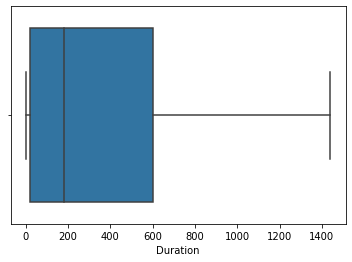

In [ ]:
# your code here
# report the basic statistics of duration in 'validated' dataset
# boxplot code here
print(df['Duration'].describe())
import seaborn as sns
import copy
df3 = copy.copy(df)
df3.sort_values(by=['Duration'], inplace=True)
ax = sns.boxplot(x=df3['Duration'], showfliers = False)

### (15pts) Part 1c: Can we do better?
Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so **make detailed notes of what decisions you are making and why**.

In [ ]:
# your code here 
# clean data 
# convert cleaned durations to seconds
df1 = pd.read_csv('ufos_in_texas.csv')
df1.head()


,Unnamed: 0,Date / Time,City,State,Shape,Duration,Summary,Posted
0,0,12/14/21 22:30,Dallas,TX,Formation,8 minutes,It was loud like rocket in a V shape.,12/19/21
1,1,12/12/21 17:30,Dallas,TX,Light,10 minutes,A light that was fading in and out.,12/19/21
2,2,12/9/21 16:30,Lazerbet,TX,Other,Google maping,It's big,12/19/21
3,3,12/9/21 16:00,Lazerbet,TX,Triangle,NaN,Unhuman,12/19/21
4,4,12/7/21 17:30,Oak Cliff,TX,Unknown,NaN,I was randomly taking pictures of the clouds a...,12/19/21


In [ ]:
original = df1.shape

In [ ]:
df1 = df1.dropna()
df1 = df1[df1['Duration'].str.contains(r'^(\d|<|>)\d*\D*\d{0,}')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [ ]:
df1.head()

,Unnamed: 0,Date / Time,City,State,Shape,Duration,Summary,Posted
0,0,12/14/21 22:30,Dallas,TX,Formation,8 minutes,It was loud like rocket in a V shape.,12/19/21
1,1,12/12/21 17:30,Dallas,TX,Light,10 minutes,A light that was fading in and out.,12/19/21
9,9,12/1/21 08:00,Austin,TX,Changing,5 years,((HOAX)) UFO on a star with men in red armore...,12/19/21
12,12,11/12/21 10:00,Hickory Creek,TX,Circle,2-3 minutes,2 identical circular orange spheres traveling ...,11/15/21
14,14,11/6/21 14:00,Abilene,TX,Changing,30 minutes,"I was outside waiting on my ride, when a white...",11/15/21


In [ ]:
def explorer_modified(txt):
  # if not re.search("\d{1,}",txt):
  #   return 0
  a = txt.split(" ")
  mult = 1
  num = 0
  if re.search("day+",txt.lower()):
    mult = 86400
  elif re.search("hour+",txt.lower()) or re.search("hr+",txt.lower()) :
    mult = 3600
  elif re.search("min+",txt.lower()):
    mult = 60
  elif re.search("second+",txt.lower()):
    mult = 1
  b = []
  if '<' in a[0] or '>' in a[0]:
    b1 = int(str((re.findall('\d{1,}',a[0]))[0])) if len(str(re.findall('\d{1,}',a[0]))) > 2 else 0
    num = (b1+0) 
  elif ' - ' in a[0]:
    b = a[0].split(' - ')
    b1 = int(str((re.findall('\d{1,}',b[0]))[0])) if len(str(re.findall('\d{1,}',b[0]))) > 2 else 0
    b2 = int(str((re.findall('\d{1,}',b[1]))[0])) if len(str(re.findall('\d{1,}',b[1]))) > 2 else 0
    num = (b1+b2)/2
  elif '-' in a[0]:
    b = a[0].split('-')
    # print(b[0], " ", len(str(re.findall('\d{1,}',b[1]))))
    b1 = int(str((re.findall('\d{1,}',b[0]))[0])) if len(str(re.findall('\d{1,}',b[0]))) > 2 else 0
    b2 = int(str((re.findall('\d{1,}',b[1]))[0])) if len(str(re.findall('\d{1,}',b[1]))) > 2 else 0
    num = (b1+b2)/2
  else:
    b1 = int(str((re.findall('\d{1,}',a[0]))[0])) if len(str(re.findall('\d{1,}',a[0]))) > 2 else 0
    num = (b1+0)
  return (num)*mult

df1['Duration'] = df1['Duration'].apply(explorer_modified)
df1 = df1[df1['Duration']>0]
df1.head()

,Unnamed: 0,Date / Time,City,State,Shape,Duration,Summary,Posted
0,0,12/14/21 22:30,Dallas,TX,Formation,480.0,It was loud like rocket in a V shape.,12/19/21
1,1,12/12/21 17:30,Dallas,TX,Light,600.0,A light that was fading in and out.,12/19/21
9,9,12/1/21 08:00,Austin,TX,Changing,5.0,((HOAX)) UFO on a star with men in red armore...,12/19/21
12,12,11/12/21 10:00,Hickory Creek,TX,Circle,150.0,2 identical circular orange spheres traveling ...,11/15/21
14,14,11/6/21 14:00,Abilene,TX,Changing,1800.0,"I was outside waiting on my ride, when a white...",11/15/21


In [ ]:
 # your code here
# total rows in original dataset
# valid rows in your cleaned dataset
print("Original:", original)
print("Cleaned:", df1.shape)

Original: (5631, 8)
Cleaned: (4656, 8)


In [ ]:
# your code here
# report the basic statistics of duration in your cleaned dataset
# draw a boxplot for your cleaned dataset
print(df1.Duration.describe())

count      4656.000000
mean       1288.201568
std       10807.448365
min           1.000000
25%          20.000000
50%         150.000000
75%         600.000000
max      345600.000000
Name: Duration, dtype: float64


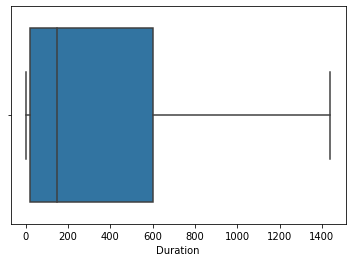

In [ ]:
import seaborn as sns
import copy
df2 = copy.copy(df1)
df2.sort_values(by=['Duration'], inplace=True)
ax = sns.boxplot(x=df2['Duration'], showfliers = False)
# boxplot = df1.boxplot(column=['Duration'])

### (5pts) Part 1d: Observations and Conclusions

Based on your analysis on part 1b and 1c, what observations or conclusions can you make from the data?

From the above observation, I think:


1.   Nearly 50% of the durations that has been reported misses the standard way of mentioning time. Thus, in the first phase of cleaning, our final data set misses out a lot of observations. This can also be observed via the basic statistics and the box plot 
2.   In the second way of cleaning, we imrpove a lot more, but reducing the amout of data missed by from 50% o 20%. This allows to take into account a lot more obeservations. This too can be observed from the basic statistics and bo plot.
3. If only the way reports are reported followed a stricter template from the source webpage, a lot less effort would have been required for cleaning. In addition, the basic statistics would be much closer to the real world data and thus would be more indicative of the pattern of the UFO data is report thourghout Texas.



### (5pts) Part 1e: Next Steps

Now is your chance to conduct an interesting analysis on the UFO data you have collected. This is open-ended, so you may choose whatever direction you like. For example, you might want to take a look at the shape of the UFOs or perhaps the temporal aspects of the reports. 

In [ ]:
import matplotlib.pyplot as plt

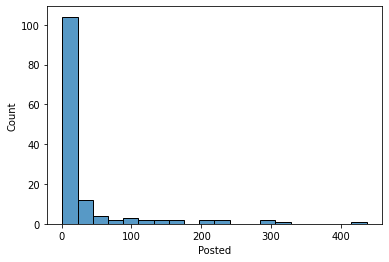

In [ ]:
# your code here
df2 = df1.groupby(df1['Duration']).count()
s = sns.histplot(df2.Posted, bins=20)


Text(0, 0.5, 'Frequency')

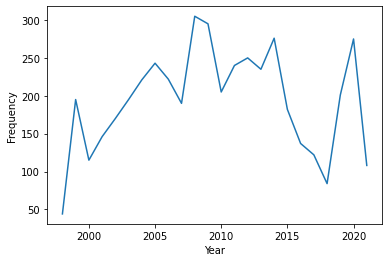

In [ ]:
df3 = pd.to_datetime(df1.Posted)
df3 = df3.groupby(df3.dt.year).count()
s = sns.lineplot(data=df3, markers=True)
s.set_xlabel("Year")
s.set_ylabel("Frequency")

*tell us what next steps you took, and what you discovered*

Text(0.5, 0, 'Hour of the day')

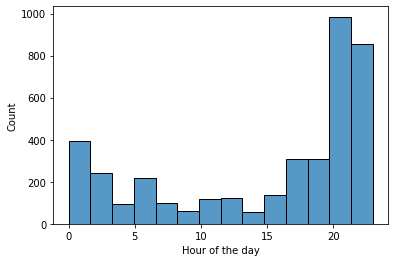

In [ ]:
X = list(pd.to_datetime(df1['Date / Time'][:4000]))
hr = []
for i in range(len(X)):
  hr.append(X[i].hour)
s = sns.histplot(hr)
s.set_xlabel("Hour of the day")

Text(0, 0.5, 'Count')

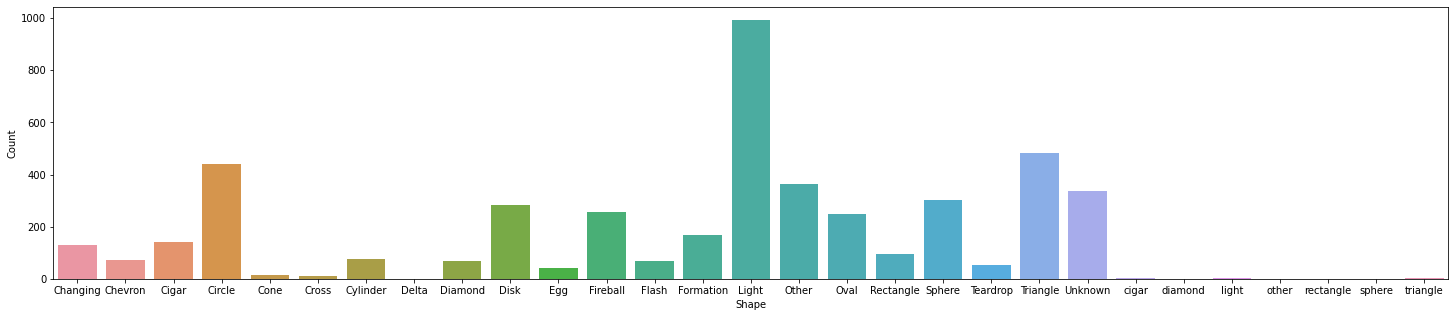

In [ ]:
df5 = df1.Shape.groupby(df1['Shape']).count()
plt.figure(figsize=(25,5))
ylabel = "Times"
s = sns.barplot(x=df5.index, y=df5[:])
s.set_ylabel("Count")

From the above set of histograms, barplot and line plot, I would conclude the following:

*   The duration of each of the reportings made are clustered nearl the left end of the time spectrum. Further more most of the reportings were made during the dusk or night when the visibility is low.
* From the histogram of shapes, though they vary greatly, we can observe that mostly they were **light shape**. Some less minor shapes reported would be **circle**, **triangle**, **disk** or **fireball**.
* From the trend of dates that they were posted, though the graph is haphazard and noisy, there is a general increasing trend till approx 2010, post which it sort of plateaus.

From the above observations, we might comclude the following:
* Most of the sighting might have been the neon side lights of various shops or stores. Fireballs may can be explained as a blurry image of the same(assuming the reporter had some issue with his vision for example - lossing his/her glasses).
* Since most of reportings were at night, the above hypothesis is further reinforced. At night, visiblity is reduced and since there is no mention of the atmospheric condition, many of the findings can be explained. For example raindrops on eyes could make neon signs appear as fireballs.




## (50 points) Part 2: Association Rules in Movie Rating Behaviors

For the second part of this homework, we're going to examine movies using our understanding of association rules, to find movies that "go together". For this part, you will implement the apriori algorithm, and apply it to a movie rating dataset. We'll use the [MovieLens](https://grouplens.org/datasets/movielens/) dataset.

First, run the next cell to load the dataset we are going to use.

In [ ]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
!ls ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In this dataset, there are four columns: `userId` is the integer ids of users, `movieId` is the integer ids of movies, `rating` is the rate of the user gives to the movie, and `timestamp` which we do not use here. Each row denotes that the user of given `userId` rated the movie of the given `movieId`. We are going to treat each user as a "basket", so you will need to collect all the movies that have been rated by a single user as a basket. 

Now, you need to implement the apriori algorithm and apply it to this dataset to find association rules of user rating behaviors where:

1. Define `rating` >= 3 is "like" (that is, only consider movie ratings of 3 or higher in your baskets; you may ignore all others)
2. `minsup` == 40 (out of 600 users/baskets); we may adjust this based on the discussion on Campuswire
3. `minconf` == to be determined by a discussion on Campuswire. You may try several different choices, but we will converge on a good choice for everyone for the final submission.
 
We know there are many existing implementations of apriori online (check github for some good starting points). You are welcome to read existing codebases and let that inform your approach. Do not copy-paste any existing code. We want your code to have sufficient comments to explain your steps, to show us that you really know what you are doing. Furthermore, you should add print statements to print out the intermediate steps of your method -- e.g., the size of the candidate set at each step of the method, the size of the filtered set, and any other important information you think will highlight the method. 

To help get you started, we can load the ratings with the following code snippet:

In [ ]:
import pandas as pd
# read user ratings
allRatings = pd.read_csv("ml-latest-small/ratings.csv")
allRatings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### (15pts) Step 1: Implement Apriori Algorithm
In this section, you need to implement the Apriori algorithm, we will check the correctness of your code and we encourage efficient implementation and skills of pruning.

In [ ]:
# your code here
from itertools import combinations
from itertools import chain
from tqdm import tqdm

'''
Code to count the support. Logic is simple: I check is the given tuple of objects fall under any transactions
that has happened under various users. If yes, then incrase the count and at the end, return the total count of the support
'''
def count_support(item, transactions):
  support = 0
  for userID in transactions.keys():
    if item.issubset(transactions[userID]):
      support+=1
  return support

'''
Code to generate frequnt itemsets based on support. I check if the given tuple of objects have support greater than a certain threshold.
If yes, then I append it to a list and at the end, return the list. This is also a pruning step since these itemset would be used to generate
next level of frequent itemsets
'''
def generate_frequency_itemset(combinations, min_sup, transactions):
  new_itemset = []
  for item in tqdm(combinations):
    if count_support(set(item), transactions)>=min_sup:
      new_itemset.append(item)
  return new_itemset

'''
Code to generate all possible combinations, which later is pruned to generate a frequent itemset.
I unwrap the items and store it in a set to remove the duplicates. Then I use combinations itertool
to generate all possible combination of a given size indicated by parameter level
'''
def generate_combinations(cur_freq_itemset, level):
  combo = set(map(int, chain.from_iterable(cur_freq_itemset)))
  new_freq_itemset = list(combinations(combo, level))
  return new_freq_itemset

'''
Code to generate apriori algorithm. From all the transactions under various users and all possible movies,
I generate level 1 frequent itemset. Once this is done, I generate all possible combinations level by level in 
an iterative manner till the final frequent itemset has no item. The procedure I follow here is as follows:
* generate combination
* prune combination
* store the item set and repeat
'''
def apriori(transactions, min_support, itemset_0):
  cur_level = 1
  itemsets = {}
  cur_freq_itemset = []

  for movieID in itemset_0.keys():
    if itemset_0[movieID] >= min_support:
      cur_freq_itemset.append((movieID,))

  # itemsets.append(set(cur_freq_itemset))
  while len(cur_freq_itemset)>0 :
    cur_level+=1
    possible_combinations = generate_combinations(cur_freq_itemset, cur_level)
    cur_freq_itemset = generate_frequency_itemset(possible_combinations, min_support, transactions)
    print(len(cur_freq_itemset))
    if len(cur_freq_itemset)>0:
      itemsets[cur_level] =(list(cur_freq_itemset))
  return itemsets

In [ ]:
from collections import defaultdict

'''
Code to generate baskets given all the transactions. We use a deafaultdictionary of sets to store the movieId under various users
frequent itemset0 too is generated here. We simple create a dictionary that contains the count of movies that have ratings greater than 3
'''
def getBaskets(transaction):
  baskets = defaultdict(set) 
  movies = {}
  for row in transaction.itertuples():
    if row.rating>=3:
      try:
            movies[row.movieId]+=1
      except KeyError:
            movies[row.movieId]=1
      baskets[row.userId].add(row.movieId)

  for x in movies.keys():
    movies[x] = movies[x]
  return baskets, movies

baskets, movies=getBaskets(allRatings)
min_sup = 140
itemsets = apriori(baskets, min_sup, movies)

100%|██████████| 820/820 [00:00<00:00, 8369.24it/s]


49


100%|██████████| 1330/1330 [00:00<00:00, 7479.51it/s]


7


100%|██████████| 330/330 [00:00<00:00, 6091.35it/s]

0


### (5pts) Step 2: Print Your Association Rules

Next you should print your final association rules in the following format:

**movie_name_1, movie_name_2, ... --> 
movie_name_k**

where the movie names can be fetched by joining the movieId with the file `movies.csv`. For example, one rule that you might find is:

**Matrix, The (1999),  Star Wars: Episode V - The Empire Strikes Back (1980),  Star Wars: Episode IV - A New Hope (1977),  -> 
Star Wars: Episode VI - Return of the Jedi (1983)**

In [ ]:
# your code here
'''
Code to get the confidence. The procedure is pretty simple. Confidence ofa rule is ration of (itemset+newobject/itemset)
'''
def get_confidence(itemset, target, transactions):
 confidence = count_support(target, transactions)/count_support(itemset, transactions)
 return confidence

def find_rules(freq_itemset, min_confidence, transactions):
  rule=[]
  for level in freq_itemset.keys():
    for groups in freq_itemset[level]:
      # print(groups)
      group = set(groups)
      for item in group:
        if get_confidence(group-{item}, group, transactions)>=min_confidence:
          rule.append((group-{item},item))
  return rule 
asso_rule = find_rules(itemsets, 0.8, baskets)

In [ ]:
moviename = pd.read_csv('ml-latest-small/movies.csv')

def get_movie_name(movieId):
  return moviename.loc[moviename['movieId']==movieId]['title'].values[0]

In [ ]:
def printRule(association_rule):
  for level in association_rule:
    print('{',end=' ')
    for item in level[0]:
      print(get_movie_name(item), ',',end = ' ')
    print('}->',get_movie_name(level[1]))

printRule(asso_rule)

{ Lord of the Rings: The Fellowship of the Ring, The (2001) , }-> Lord of the Rings: The Two Towers, The (2002)
{ Lord of the Rings: The Two Towers, The (2002) , }-> Lord of the Rings: The Fellowship of the Ring, The (2001)
{ Lord of the Rings: The Return of the King, The (2003) , }-> Lord of the Rings: The Fellowship of the Ring, The (2001)
{ Lord of the Rings: The Fellowship of the Ring, The (2001) , }-> Lord of the Rings: The Return of the King, The (2003)
{ Star Wars: Episode V - The Empire Strikes Back (1980) , }-> Star Wars: Episode IV - A New Hope (1977)
{ Star Wars: Episode VI - Return of the Jedi (1983) , }-> Star Wars: Episode IV - A New Hope (1977)
{ Saving Private Ryan (1998) , }-> Matrix, The (1999)
{ Apollo 13 (1995) , }-> Forrest Gump (1994)
{ Seven (a.k.a. Se7en) (1995) , }-> Pulp Fiction (1994)
{ Star Wars: Episode VI - Return of the Jedi (1983) , }-> Star Wars: Episode V - The Empire Strikes Back (1980)
{ Lord of the Rings: The Return of the King, The (2003) , }-> Lor

In [ ]:
print('The number of association rules: {}'.format(sum([1 for a in asso_rule])))
print('The number of Baskets created : {}'.format(len(baskets)))
a = [(k,len(itemsets[k])) for k in itemsets.keys()]
print('The frequent itemsets =: {}'.format(a))

The number of association rules: 24
The number of Baskets created : 609
The frequent itemsets =: [(2, 49), (3, 7)]


### (15pts) Step 3: Implement Random Sampling

We discussed in class a method to randomly sample baskets to avoid the overhead of reading the entire set of baskets (which in practice, could amount to billions of baskets). For this part, you should implement such a random sampling approach that takes a special parameter **alpha** that controls the size of the sample: e.g., alpha = 0.10 means to sample 10% of the baskets (our users, in this case). 

Vary **alpha** and report the number of frequent itemsets you find and how this compares to the number of frequent itemsets in the entire dataset. What do you discover?


In [ ]:
import random
# your code here
'''
Random sampling of baskets is done once we get all the baskets from the list of transactions.
Random sampling is simply picking users at random from the baskets along with all the movies the reviewed
'''
def get_sample_itemset(alpha, transactions, minsup_sample, r_state):
  baskets,_ = getBaskets(transactions)
  n = len(baskets)
  random_basket = random.sample(list(baskets.items()), int(n * alpha))
  sample_Basket = {}
  for a,b in random_basket:
    sample_Basket[a] = b
  sample_movies = {}
  for i in sample_Basket.values():
    for v in i:
      try:
          sample_movies[v]+=1
      except KeyError:
          sample_movies[v]=1
  for x in sample_movies.keys():
    sample_movies[x] = sample_movies[x]
  sup_sample = minsup_sample
  asso_sample_itemset = apriori(sample_Basket, sup_sample, sample_movies)
  return asso_sample_itemset, sample_Basket

asso_gen = []
rules_gen = []
for q in range(5, 10, 1):
  alpha = q/10
  minsup_sample = 100
  print('Alpha: {}_____________________________________________________________________ '.format(alpha))
  asso_sample_itemset, sample_Basket = get_sample_itemset(alpha, allRatings, minsup_sample,1)
  print('The number of Baskets created : {}'.format(len(sample_Basket)))
  c = sum([len(asso_sample_itemset[a]) for a in asso_sample_itemset.keys()])
  asso_gen.append(c)
  print('The number of frequent itemsets : {}'.format(sum([len(asso_sample_itemset[a]) for a in asso_sample_itemset.keys()])))
  sample_asso_rule = find_rules(asso_sample_itemset, 0.8, sample_Basket)
  # print(asso_sample_itemset)
  b = sum([1 for a in sample_asso_rule])
  rules_gen.append(b)
  print('The number of association rules itemsets : {}'.format(sum([1 for a in sample_asso_rule])))
  printRule(sample_asso_rule)
  print('\n')

Alpha: 0.5_____________________________________________________________________ 


100%|██████████| 66/66 [00:00<00:00, 11069.86it/s]


3


100%|██████████| 1/1 [00:00<00:00, 1223.19it/s]


0
The number of Baskets created : 304
The number of frequent itemsets : 3
The number of association rules itemsets : 0


Alpha: 0.6_____________________________________________________________________ 


100%|██████████| 378/378 [00:00<00:00, 12999.09it/s]


13


100%|██████████| 56/56 [00:00<00:00, 6971.21it/s]


0
The number of Baskets created : 365
The number of frequent itemsets : 13
The number of association rules itemsets : 3
{ Star Wars: Episode V - The Empire Strikes Back (1980) , }-> Star Wars: Episode IV - A New Hope (1977)
{ Star Wars: Episode V - The Empire Strikes Back (1980) , }-> Matrix, The (1999)
{ Jurassic Park (1993) , }-> Forrest Gump (1994)


Alpha: 0.7_____________________________________________________________________ 


100%|██████████| 861/861 [00:00<00:00, 11983.57it/s]


54


100%|██████████| 1540/1540 [00:00<00:00, 12153.58it/s]


7


100%|██████████| 126/126 [00:00<00:00, 6625.16it/s]


0
The number of Baskets created : 426
The number of frequent itemsets : 61
The number of association rules itemsets : 23
{ Lord of the Rings: The Fellowship of the Ring, The (2001) , }-> Lord of the Rings: The Two Towers, The (2002)
{ Lord of the Rings: The Two Towers, The (2002) , }-> Lord of the Rings: The Fellowship of the Ring, The (2001)
{ Lord of the Rings: The Return of the King, The (2003) , }-> Lord of the Rings: The Fellowship of the Ring, The (2001)
{ Lord of the Rings: The Fellowship of the Ring, The (2001) , }-> Lord of the Rings: The Return of the King, The (2003)
{ Star Wars: Episode V - The Empire Strikes Back (1980) , }-> Star Wars: Episode IV - A New Hope (1977)
{ Star Wars: Episode VI - Return of the Jedi (1983) , }-> Star Wars: Episode IV - A New Hope (1977)
{ Saving Private Ryan (1998) , }-> Matrix, The (1999)
{ Apollo 13 (1995) , }-> Forrest Gump (1994)
{ Seven (a.k.a. Se7en) (1995) , }-> Pulp Fiction (1994)
{ Star Wars: Episode VI - Return of the Jedi (1983) , }-

100%|██████████| 1711/1711 [00:00<00:00, 8968.75it/s]


92


100%|██████████| 4960/4960 [00:00<00:00, 10731.75it/s]


25


100%|██████████| 3060/3060 [00:00<00:00, 10186.06it/s]


2


100%|██████████| 56/56 [00:00<00:00, 4877.00it/s]


0
The number of Baskets created : 487
The number of frequent itemsets : 119
The number of association rules itemsets : 60
{ Lord of the Rings: The Fellowship of the Ring, The (2001) , }-> Lord of the Rings: The Two Towers, The (2002)
{ Lord of the Rings: The Two Towers, The (2002) , }-> Lord of the Rings: The Fellowship of the Ring, The (2001)
{ Lord of the Rings: The Return of the King, The (2003) , }-> Lord of the Rings: The Fellowship of the Ring, The (2001)
{ Lord of the Rings: The Fellowship of the Ring, The (2001) , }-> Lord of the Rings: The Return of the King, The (2003)
{ Star Wars: Episode V - The Empire Strikes Back (1980) , }-> Star Wars: Episode IV - A New Hope (1977)
{ Star Wars: Episode VI - Return of the Jedi (1983) , }-> Star Wars: Episode IV - A New Hope (1977)
{ Sixth Sense, The (1999) , }-> Matrix, The (1999)
{ Saving Private Ryan (1998) , }-> Matrix, The (1999)
{ Gladiator (2000) , }-> Matrix, The (1999)
{ Apollo 13 (1995) , }-> Forrest Gump (1994)
{ Seven (a.k.a. 

100%|██████████| 3240/3240 [00:00<00:00, 7473.47it/s]


183


100%|██████████| 11480/11480 [00:01<00:00, 8918.18it/s]


73


100%|██████████| 5985/5985 [00:00<00:00, 8898.80it/s]


5


100%|██████████| 792/792 [00:00<00:00, 8562.85it/s]


0
The number of Baskets created : 548
The number of frequent itemsets : 261
The number of association rules itemsets : 137
{ Sixth Sense, The (1999) , }-> Matrix, The (1999)
{ Saving Private Ryan (1998) , }-> Matrix, The (1999)
{ Gladiator (2000) , }-> Matrix, The (1999)
{ Seven (a.k.a. Se7en) (1995) , }-> Pulp Fiction (1994)
{ Beauty and the Beast (1991) , }-> Aladdin (1992)
{ Apollo 13 (1995) , }-> Forrest Gump (1994)
{ Star Wars: Episode VI - Return of the Jedi (1983) , }-> Star Wars: Episode V - The Empire Strikes Back (1980)
{ Star Wars: Episode V - The Empire Strikes Back (1980) , }-> Star Wars: Episode IV - A New Hope (1977)
{ Indiana Jones and the Last Crusade (1989) , }-> Star Wars: Episode V - The Empire Strikes Back (1980)
{ Indiana Jones and the Last Crusade (1989) , }-> Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
{ Star Wars: Episode VI - Return of the Jedi (1983) , }-> Star Wars: Episode IV - A New Hope (1977)
{ Godfather: Part II, The (

Text(0, 0.5, '# rules generated')

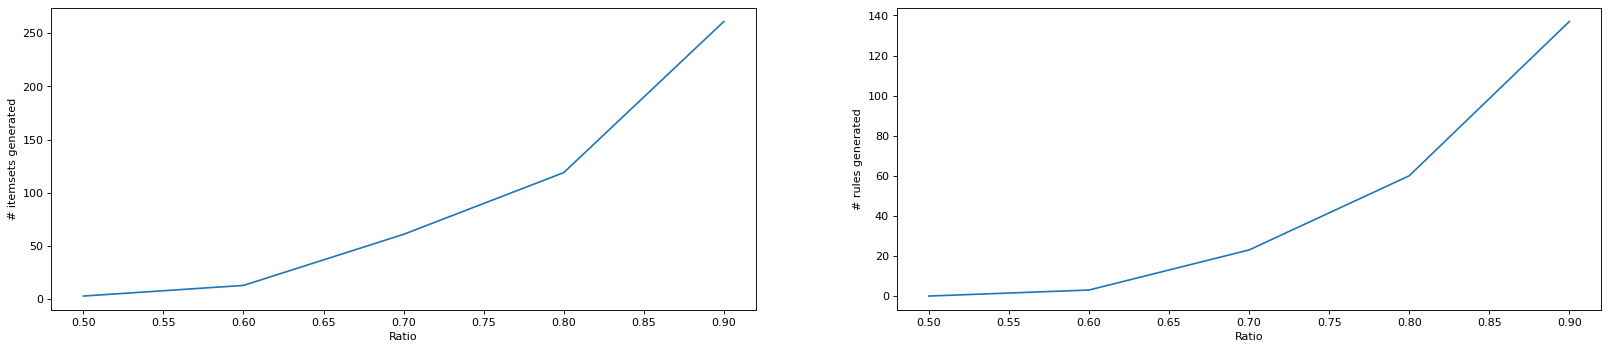

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# rules_gen
fig = plt.figure(figsize=(25, 5), dpi=80)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.subplot(1, 2, 1)
s = sns.lineplot(y=asso_gen,x=[q/10 for q in range(5, 10, 1)])
s.set_xlabel("Ratio")
s.set_ylabel("# itemsets generated")
plt.subplot(1, 2, 2)
s = sns.lineplot(y=rules_gen, x=[q/10 for q in range(5, 10, 1)])
s.set_xlabel("Ratio")
s.set_ylabel("# rules generated")

As we changed the sampling ratio from 0.5 to 0.9, we observe that the number of itemsets that are generated, increase drastically. This result is quite is quite intuitive as, sampling ratio directly represents our search space from which we generate our rules from. As this search space increases, we find more and more patterns repeatedly over and over again, and thus these findings qualify the minimum confidence (which is set to 80%).

The same can be said about the association rules generated.

### (10pts) Step 4: Check for False Positives

Next you should verify that the candidate pairs you discover by random sampling are truly frequent by comparing to the itemsets you discover over the entire dataset. 

For this part, consider another parameter **minsup_sample** that relaxes the minimum support threshold. For example if we want minsup = 1/100 for whole dataset, then try minsup_sample = 1/125 for the sample. This will help catch truly frequent itemsets.

Vary **minsup_sample** and report the number of frequent itemsets you find and the number of false positives you find. What do you discover?


In [ ]:
def getFalsePositives(sample_itemset, main_itemset):
  count_diff=0
  count_same = 0
  for key in sample_itemset.keys():
    for element in sample_itemset[key]:
      if element not in main_itemset[key]:
        count_diff+=1
      else:
        count_same+=1
  return count_diff, count_same

min_sup = 100
alpha = 1
print("Baseline support sample>={}__________________________________________".format(100))
baseline_itemsets, sample_Basket = get_sample_itemset(alpha, allRatings, min_sup,1)
baseline_sample_asso_rule = find_rules(baseline_itemsets, 0.8, sample_Basket)
baseline_rules = sum([1 for a in baseline_sample_asso_rule])


mismatch_per = []
asso_rule_gen = []
for q in range(100, 200, 10):
  minsup_sample = q
  alpha = 1
  print("Minimum support sample>={}__________________________________________".format(minsup_sample))
  asso_sample_itemset, sample_Basket = get_sample_itemset(alpha, allRatings, q,1)
  dif,mat = getFalsePositives(asso_sample_itemset, baseline_itemsets)
  print("Total Mismatches: {}, Total Matches {}".format(dif,mat))
  print("Percentage mimsmatch {:.2f}%".format(100*dif/(dif+mat)))
  mismatch_per.append(100*dif/(dif+mat))
  sample_asso_rule = find_rules(asso_sample_itemset, 0.8, sample_Basket)
  b = sum([1 for a in sample_asso_rule])
  asso_rule_gen.append(b/baseline_rules)
  print('')


Baseline support sample>=100__________________________________________


100%|██████████| 4851/4851 [00:00<00:00, 7233.00it/s]


314


100%|██████████| 32509/32509 [00:04<00:00, 7968.32it/s]


184


100%|██████████| 46376/46376 [00:05<00:00, 7901.14it/s]


23


100%|██████████| 8568/8568 [00:01<00:00, 7876.96it/s]


0
Minimum support sample>=100__________________________________________


100%|██████████| 4851/4851 [00:00<00:00, 7640.83it/s]


314


100%|██████████| 32509/32509 [00:04<00:00, 7548.85it/s]


184


100%|██████████| 46376/46376 [00:05<00:00, 7748.47it/s]


23


100%|██████████| 8568/8568 [00:01<00:00, 7679.37it/s]


0
Total Mismatches: 0, Total Matches 521
Percentage mimsmatch 0.00%

Minimum support sample>=110__________________________________________


100%|██████████| 3240/3240 [00:00<00:00, 7961.49it/s]


196


100%|██████████| 12341/12341 [00:01<00:00, 7979.30it/s]


79


100%|██████████| 7315/7315 [00:00<00:00, 7647.74it/s]


5


100%|██████████| 792/792 [00:00<00:00, 7111.24it/s]


0
Total Mismatches: 0, Total Matches 280
Percentage mimsmatch 0.00%

Minimum support sample>=120__________________________________________


100%|██████████| 2278/2278 [00:00<00:00, 7455.84it/s]


117


100%|██████████| 7770/7770 [00:01<00:00, 7581.68it/s]


33


100%|██████████| 3876/3876 [00:00<00:00, 7205.17it/s]


2


100%|██████████| 56/56 [00:00<00:00, 4004.38it/s]


0
Total Mismatches: 37, Total Matches 115
Percentage mimsmatch 24.34%

Minimum support sample>=130__________________________________________


100%|██████████| 1275/1275 [00:00<00:00, 3545.89it/s]


75


100%|██████████| 3276/3276 [00:01<00:00, 1973.86it/s]


12


100%|██████████| 715/715 [00:00<00:00, 3018.64it/s]


0
Total Mismatches: 24, Total Matches 63
Percentage mimsmatch 27.59%

Minimum support sample>=140__________________________________________


100%|██████████| 820/820 [00:00<00:00, 2070.88it/s]


49


100%|██████████| 1330/1330 [00:00<00:00, 2206.78it/s]


7


100%|██████████| 330/330 [00:00<00:00, 3430.68it/s]


0
Total Mismatches: 19, Total Matches 37
Percentage mimsmatch 33.93%

Minimum support sample>=150__________________________________________


100%|██████████| 666/666 [00:00<00:00, 8078.78it/s]


30


100%|██████████| 969/969 [00:00<00:00, 8310.29it/s]


2


100%|██████████| 1/1 [00:00<00:00, 1236.53it/s]


0
Total Mismatches: 13, Total Matches 19
Percentage mimsmatch 40.62%

Minimum support sample>=160__________________________________________


100%|██████████| 465/465 [00:00<00:00, 8013.90it/s]


14


100%|██████████| 120/120 [00:00<00:00, 6380.06it/s]


1


0it [00:00, ?it/s]


0
Total Mismatches: 8, Total Matches 7
Percentage mimsmatch 53.33%

Minimum support sample>=170__________________________________________


100%|██████████| 378/378 [00:00<00:00, 7691.12it/s]


9


100%|██████████| 56/56 [00:00<00:00, 4746.51it/s]


0
Total Mismatches: 4, Total Matches 5
Percentage mimsmatch 44.44%

Minimum support sample>=180__________________________________________


100%|██████████| 210/210 [00:00<00:00, 8167.84it/s]


6


100%|██████████| 4/4 [00:00<00:00, 1454.46it/s]


0
Total Mismatches: 2, Total Matches 4
Percentage mimsmatch 33.33%

Minimum support sample>=190__________________________________________


100%|██████████| 120/120 [00:00<00:00, 8601.20it/s]


3


100%|██████████| 1/1 [00:00<00:00, 1124.78it/s]

0
Total Mismatches: 2, Total Matches 1
Percentage mimsmatch 66.67%



Text(0, 0.5, '% Raio of rules generated')

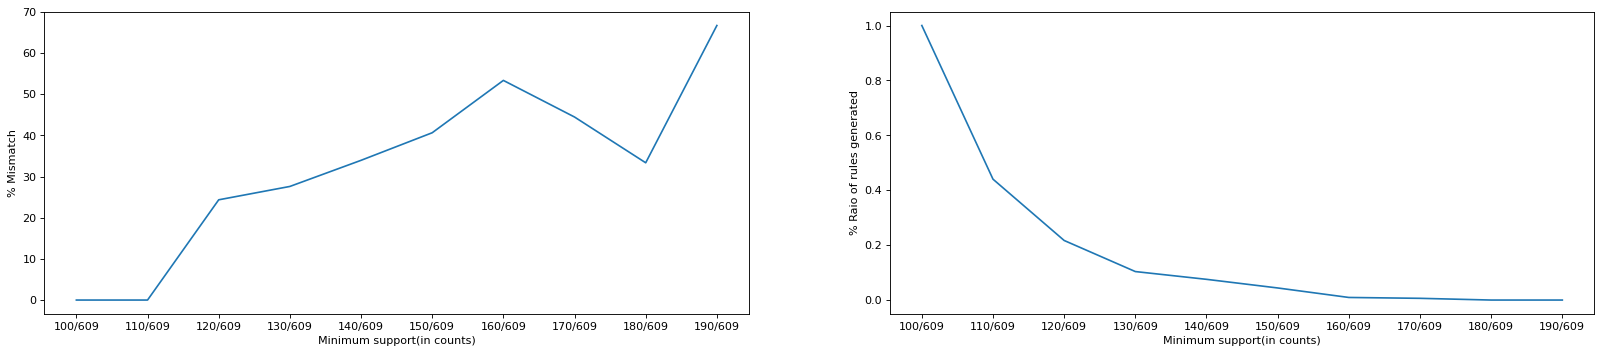

In [ ]:
fig = plt.figure(figsize=(25, 5), dpi=80)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.subplot(1, 2, 1)
s = sns.lineplot(x=[str(r)+"/609" for r in range(100, 200, 10)],y=mismatch_per)
s.set_xlabel("Minimum support(in counts)")
s.set_ylabel("% Mismatch")
plt.subplot(1, 2, 2)
s = sns.lineplot(x=[str(r)+"/609" for r in range(100, 200, 10)],y=asso_rule_gen)
s.set_xlabel("Minimum support(in counts)")
s.set_ylabel("% Raio of rules generated")

The below results take the base support of 100/609. That is, mismatches are calculated based on this baseline
*  The results graphs shows, when we increase the minimum support from 100 to 200 of the 609 users, the amount of mismatch increases. This result too is intuitive since when we increased the minimum support, we made it harder for the associations to qualify. Thus, many pair or triplet or quadruplets which were present in the original dataset, would not be present in the one with higher support.

### (5pts) Step 5: Extensions and Next Steps

So far, we have been working with a fairly small dataset. For this last question, try your sampling-based approach on the much larger: **Movies 10M** dataset: https://files.grouplens.org/datasets/movielens/ml-10m.zip

First, we need to load this larger dataset:

In [ ]:
import urllib3
import zipfile

http = urllib3.PoolManager()
req = http.request("GET", "https://files.grouplens.org/datasets/movielens/ml-10m.zip", preload_content=False)

with open("movie.zip", 'wb') as out:
  while True:
    data = req.read(4096)
    if not data:
      break
    out.write(data)
req.release_conn()

zFile = zipfile.ZipFile("movie.zip", "r")
for fileM in zFile.namelist():
  zFile.extract(fileM)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
! ls ml-10M100K/

allbut.pl  movies.dat  ratings.dat  README.html  split_ratings.sh  tags.dat


In [ ]:
import pandas as pd
# read user ratings
allRatings = pd.read_csv("ml-10M100K/ratings.dat",sep='::', names=["userId", "movieId", "rating", "timestamp"], engine='python')
allRatings

,userId,movieId,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


Now you can begin your sampling over this larger dataset.

In [ ]:
alpha = 1/50
minsup_sample = 100
asso_sample_itemset_big, sample_Basket_big = get_sample_itemset(alpha, allRatings, minsup_sample,1)
sample_asso_rule_big = find_rules(asso_sample_itemset_big, 0.8, sample_Basket_big)

100%|██████████| 10440/10440 [00:04<00:00, 2172.35it/s]


768


100%|██████████| 95284/95284 [00:43<00:00, 2190.33it/s]


857


100%|██████████| 270725/270725 [02:12<00:00, 2040.96it/s]


399


100%|██████████| 169911/169911 [01:20<00:00, 2113.65it/s]


34


100%|██████████| 924/924 [00:00<00:00, 1990.60it/s]


0


In [ ]:
print('The number of frequent item sets : {}'.format(sum([len(asso_sample_itemset_big[a]) for a in asso_sample_itemset_big.keys()])))
printRule(sample_asso_rule_big)
# print(len(sample_Basket_big))

The number of frequent item sets : 2058
{ Sleepless in Seattle (1993) , }-> Forrest Gump (1994)
{ Reservoir Dogs (1992) , }-> Silence of the Lambs, The (1991)
{ Reservoir Dogs (1992) , }-> Pulp Fiction (1994)
{ Home Alone (1990) , }-> Forrest Gump (1994)
{ Home Alone (1990) , }-> Jurassic Park (1993)
{ Terminator, The (1984) , }-> Terminator 2: Judgment Day (1991)
{ Ghost (1990) , }-> Forrest Gump (1994)
{ Batman Forever (1995) , }-> Batman (1989)
{ Star Trek: Generations (1994) , }-> Batman (1989)
{ Pretty Woman (1990) , }-> Forrest Gump (1994)
{ Crimson Tide (1995) , }-> Apollo 13 (1995)
{ Aliens (1986) , }-> Star Wars: Episode V - The Empire Strikes Back (1980)
{ Indiana Jones and the Last Crusade (1989) , }-> Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
{ Aliens (1986) , }-> Alien (1979)
{ Godfather: Part II, The (1974) , }-> Godfather, The (1972)
{ Outbreak (1995) , }-> Fugitive, The (1993)
{ Lord of the Rings: The Two Towers, The (2002) , }-> Lor

In [ ]:
print('The number of association rules: {}'.format(sum([1 for a in sample_asso_rule_big])))
print('The number of Baskets created : {}'.format(len(sample_Basket_big)))
a = [(k,len(asso_sample_itemset_big[k])) for k in asso_sample_itemset_big.keys()]
print('The frequent itemsets =: {}'.format(a))

The number of association rules: 1668
The number of Baskets created : 1397
The frequent itemsets =: [(2, 768), (3, 857), (4, 399), (5, 34)]


For the dataset of 10 million, I sampled 1/50 = 0.02 of the total dataset.
The total number of baskets thus created were approximated 1400 which is twice the smaller dataset. Intuitively, the smaller data set had approx 600 users while this bigger dataset had a little more than twice of it. However, the unexpected part is the number of rules thus obtained. In the smaller data set, **317 association rules** had been found. However, with the larger dataset with 2% sampling (that is, 2x the number of user), the total number of rules increased nearly **5x** i.e. **1668 association rules**

The itemset distribution thus found is as follows:
* two item frequent-itemset = 768
* three item frequent-itemset = 857
* four item frequent-itemset = 399
* five item frequent-itemset = 34

